# Logo Recognition Algorithm with Flickr Logos Training Data

We chose to use data copied from: http://www.image.ntua.gr/iva/datasets/flickr_logos/

The Flickr Logos 27 dataset is an annotated logo dataset downloaded from Flickr and contains more than four thousand classes in total. It consists of **three image collections/sets**.

+ **The training set** contains **810 annotated images**, corresponding to **27 logo classes/brands (30 images for each class)**. All images are annotated with bounding boxes of the logo instances in the image. We allow multiple logo instances per class image. The training set is randomly split in six subsets, each one containing five images per class.

+ **The distractor set contains 4207 logo images/classes**, that depict, in most cases, clean logos. All images come from the Flickr group Identity + Logo Design. Each one of the distractor set images defines its own logo class and we regard the whole image as bounding box.

+ Finally, **the query set consists of 270 images**. There are five images for each of the 27 annotated classes, summing up to 135 images that contain logos. Furthermore, the query set contains 135 Flickr images that do not depict any logo class, giving 270 test images in total.

The brands included in the dataset are: Adidas, Apple, BMW, Citroen, Coca Cola, DHL, Fedex, Ferrari, Ford, Google, Heineken, HP, McDonalds, Mini, Nbc, Nike, Pepsi, Porsche, Puma, Red Bull, Sprite, Starbucks, Intel, Texaco, Unisef, Vodafone and Yahoo.

## Ideas for further developing project

+ Idea for title "Examining the impact of various preprocessing steps on accuracy of an ML model"

+ Compare the impact of augmentation (and with that also the increase in data) on accuracy of model

+ Compare the improvement of accuracy when keeping color vs grey-scale and evaluate the tradeoff in terms of computing capacity

+ Compare the improvement of accuracy for different dimension sizes --> trade-off, a certain specificity is needed to find the uniqueness of the logo, but too many dimensions can lead to poorer applicability to different scenarios.


### Step 1: Accessing Raw Images Data

In [ ]:
# """Accessing Data (41.9s)"""

# url = "http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz"
# response = requests.get(url) # Send a get request to the URL
# content = response.content #content in bytes

# #saving the main file to specified directory with name "flickr27.tar"
# filename = "flickr27.tar"
# macbookuser = input("I am a macbook user (yes/no): ")
# if macbookuser == "yes":
#     specified_directory = input("Specify the path to the directory for which you want to store file (make sure to add / or \ at the end): ") #/Users/veronicalarsson/Downloads/
#     image_path = "flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz"
#     directory_separator = '/'
# else:
#     specified_direcotory = "r" + input("Specify the path to the directory for which you want to store file (make sure to add / or \ at the end): ")
#     image_path = "flickr_logos_27_dataset\flickr_logos_27_dataset_images.tar.gz"
#     directory_separator = '\\'

# with open(specified_directory + filename, "wb") as file: #the file will be opened for writing in binary (b) mode, allowing you to write (w) binary data directly to the file
#     file.write(content) #writing content to the specified filename with associated path


# #to access the files, we need to open the main tar file, we then store the unzipped files in a new directory
# tar_file_path = specified_directory + filename #path to tar.gz file
# unzipped_path = specified_directory + "unzipped" #new path to unzipped content

# with tarfile.open(tar_file_path, 'r:gz') as tar: #Open the tar.gz file and store all content in folder with specified path name
#     tar.extractall(path= unzipped_path) 


# #again we need to open a second tar file within the unzipped tar file for getting the raw images, we then store them in a new directory:
# tar_file_path_2 = unzipped_path + directory_separator + image_path
# unzipped_images_path= specified_directory + "unzipped_images"

# with tarfile.open(tar_file_path_2, 'r:gz') as tar:
#     tar.extractall(directory_separator + unzipped_images_path) #Extract all contents to a newly created directory

In [ ]:
# """Getting df with all filenames and images (missing labels at this stage)"""

# # Path to directory containing image files
# image_directory = unzipped_images_path+ directory_separator +'flickr_logos_27_dataset_images' #example: r'C:\Users\EmiliaGachowetz-Gepp\Documents\New ML\images\flickr_logos_27_dataset_images'

# # List of all files (images) in the directory
# image_filenames = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f))]

# # Function to process images and store them in a DataFrame
# def process_images(image_directory, image_filenames):
#     image_data = []  # List to store image data

#     for filename in image_filenames:
#         try:
#             image_path = os.path.join(image_directory, filename)  # Construct the full path to the image file
#             img = Image.open(image_path)  # Open the image using Pillow (PIL)
#             img = img.convert('L') #Converting to gray scale
#             img_resized = img.resize((100, 100), Image.LANCZOS)  # Resize the image to 100x100 pixels
#             # img_array = np.array(img_resized) # Convert image to numpy array if needed
#             image_data.append({'Filename': filename, 'Image': img_resized})

#         except Exception as e:
#             # Handle errors (e.g., if the image cannot be processed)
#             print(f"Error processing image {filename}: {e}")

#     # Convert the list of dictionaries to a DataFrame
#     image_df = pd.DataFrame(image_data)
#     return image_df

# # Call the function to process images and store them in a DataFrame
# image_df = process_images(image_directory, image_filenames)
# image_df.head()


In [ ]:
# # Selecting one picture from the DataFrame
# some_pic = image_df['Image'].iloc[0]

# # Display the image using matplotlib
# plt.imshow(some_pic, interpolation="lanczos")
# plt.axis("off")
# plt.show()

### Step 2: Saving data and associated labels in images_info:

The data frame is built like this:

+ Image filename (unique ID)

+ Class name (i.e. the label)

+ Training subset of class (1,...,6)

+ Coordinates of the top left and bottom right corners (x1 y1 x2 y2)

(x1 = top left horizontal, y1 = top left vertical, x2 = bottom right horizontal, y2 = bottom right vertical)

In [2]:
# #2. read csv which contains information about images
# info =pd.read_csv(unzipped_path + directory_separator + 'flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', sep='\s+', header=None)

# #renaming the columns in images_info:
# new_column_names = ['Filename', 'Label', 'Subset', 'x1', 'y1','x2', 'y2']
# info.columns=new_column_names
# #info.head()

# #merging the df with the image_df
# image_df = image_df.merge(info, how = 'inner', on = 'Filename')
# image_df = image_df[['Filename', 'Image', 'Label']]
# image_df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/pz/8dk8k_ld1bl3f5d2d_5br0300000gn/T/ipykernel_57978/3277484211.py:2: SyntaxWarning: invalid escape sequence '\s'
  info =pd.read_csv(unzipped_path + directory_separator + 'flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', sep='\s+', header=None)
/var/folders/pz/8dk8k_ld1bl3f5d2d_5br0300000gn/T/ipykernel_57978/3277484211.py:2: SyntaxWarning: invalid escape sequence '\s'
  info =pd.read_csv(unzipped_path + directory_separator + 'flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', sep='\s+', header=None)


NameError: name 'unzipped_path' is not defined

### Step 3: Augmenting the image_df data

Data augmentation is a technique used in machine learning and deep learning to artificially increase the size of a training dataset by applying various transformations to the existing data. The goal is to enhance the model's generalization ability, robustness, and performance by exposing it to a more diverse set of examples during training. This technique is particularly useful when the available dataset is limited.

Common data augmentation techniques include:

1. **Rotation:** Rotating images by a certain degree.
2. **Flip:** Flipping images horizontally or vertically.
3. **Zoom:** Zooming in or out of images.
4. **Translation:** Shifting images horizontally or vertically.
5. **Shear:** Applying a shearing transformation to images.
6. **Brightness and Contrast Adjustment:** Changing the brightness and contrast of images.
7. **Noise Injection:** Adding random noise to images.
8. **Color Jittering:** Adjusting the color values of images.

For example, in image classification tasks, if you have a dataset of cat images, you can apply data augmentation to generate variations of the same images by rotating, flipping, zooming, or changing their colors. This way, the model sees different perspectives of the same data during training, which can help it become more robust to variations and improve its performance on new, unseen data.

In deep learning frameworks and libraries, there are often built-in tools or functions for applying data augmentation during the training process. This allows practitioners to easily incorporate these transformations into their pipelines without manually creating augmented datasets.

In [ ]:
"""Augmenting and scaling all images (25m 12.3s with 270x270) --> (4m 12.6s with 100x100) --> (8m+ with 100x100 RGB)"""
# transform = transforms.ToTensor()

def augment_images(images_df):
    '''This function crops, rotates, and scales images and saves them in the specified output folder'''
    dataframes = []  # List to store DataFrames
    scaler = MinMaxScaler()

    for index, row in images_df.iterrows(): # Loop through each row in the augmented DataFrame
        filename = row['Filename']
        #x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']

        # Find the original image from the images DataFrame
        original_image_row = images_df[images_df['Filename'] == filename].iloc[0]
        original_image = original_image_row['Image']

        # Rotate, scale, and crop the image
        operations = ['original', 'rotated', 'scaled', 'top-bottom flipped']
        images = [original_image, 
                  original_image.rotate(45), 
                  original_image.resize((int(original_image.width * 1.5), int(original_image.height * 1.5))), 
                  original_image.transpose(Image.FLIP_TOP_BOTTOM)
                  ]

        for i in range(len(operations)):
            op = operations[i]
            img = images[i]
            img = img.resize((100, 100), Image.LANCZOS)
            img_array = np.array(img).flatten() # Flatten the pixel array
            img_scaled = scaler.fit_transform(img_array.reshape(-1, 1)).flatten # Scale pixel values to range [0, 1]
            data = {'Filename': [filename], 'Operation': [op]}
            data['Pixels'] = img_scaled
            for j in range(len(img_array)):
                data[f'Pixel_{j}'] = [img_array[j]] # Create a separate column for each scaled pixel
            df = pd.DataFrame(data)
            dataframes.append(df)

    # Concatenate all DataFrames in the list
    modified_df = pd.concat(dataframes, ignore_index=True)
    return modified_df

# # Storing the augmented df
# labelled_augmented_df = augment_images(image_df)
# labelled_augmented_df = pd.merge(labelled_augmented_df, images_info, on='Filename', how='inner')
# labelled_augmented_df.head(10)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# # Encoding label
# label_encoder = LabelEncoder()
# labelled_augmented_df['Label_Encoded'] = label_encoder.fit_transform(labelled_augmented_df['Label'])

# # Dropping unnecessary columns from the merged DataFrame
# training_df = labelled_augmented_df.drop(columns=['Filename', 'Operation', 'Subset', 'x1', 'y1', 'x2', 'y2'])

# print("Merged DataFrame with encoded labels:")
# training_df.head()

In [ ]:
"""Saving scaled (0-1) training data (22m 22.5s with 270x270 data) (1m 56.7s with 100x100)"""
#training_df.to_csv(specified_directory + 'model_data.csv', index = False) --> name for 270, 270 pixels data (51529 features)
#training_df.to_csv(specified_directory + 'model_data_100x100.csv', index = False) #--> name for 100,100 pixels data

## New Data:

### Loading New Dataset (Step 1)

# Reflections in first stage 

### Evaluating whether to have many categories or just one or few
When going about choosing to have a few samples from each category or many samples from the same category, we chose to rather go for many samples for one category's logos.

In this choice we evaluated several factors:

+ Do we want our research to focus on identifying that **particular industry's logos**, or are we more interested in differentiating among several industries. And when focusing on identifying logos within a particular industry, what other data do we need to train the model on?

+ To answer the second question we then evaluated, in which setting would we like to see the algorithm applied? At the moment we are taking an isolated approach where we evaluate various algorithms performance to classify the logo. 

+ One could also examine the possibility to do a **recognition/detection algorithm**, but then it would evidently be easier to focus on one solely. So if the goal is to detect your own company logo in the real world, from photos and images, this could be a suitable way to go about it. --> maybe more practical?

+ Running time and computer capacity.

### Bias in Class numbers and samples

We quickly adress potential bias from skewed nr of samples from different classes. Thus, from each brand we choose a max of 10 pictures from each, which we further augment, so we have the same nr of samples for each brand.

**OBS! In a classification task the nature of the task is to use it to differ among many brands. Nevertheless, our training data will naturally miss many logos, thus not being able to identify these, and will thus give wrong prediction.**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras 
import tarfile
import os
from PIL import Image
import PIL.ImageEnhance as ImageEnhance
import requests
from concurrent.futures import ThreadPoolExecutor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms
import torchvision
import math

In [26]:
folder_path = '/Users/veronicalarsson/Downloads/datasetcopy/trainandtest/train/Medical/'
label_path = '/Users/veronicalarsson/Downloads/datasetcopy/List/train_images.txt'

In [48]:
"""Loading (this function looks at a specified nr of photos from each folder)"""

def load_images_from_folder(folder_path, max_images_per_folder=200):
    """
    Load images from a folder and return a DataFrame containing 
    image filenames, images, sizes, aspect ratios, number of channels, 
    and labels derived from the folder names.
    """
    images = []
    label_encoder = LabelEncoder()

    # Recursively traverse through the folder structure
    for root, dirs, files in os.walk(folder_path):
        num_images_in_folder = 0  # Initialize the counter for images in the current folder
        folder_label = os.path.basename(root)  # Use the last part of the root as the label

        for filename in files:
            # Check if the maximum number of images per folder has been reached
            if num_images_in_folder >= max_images_per_folder:
                break  # Stop processing files in the current folder
            
            # Get the full path of the file
            file_path = os.path.join(root, filename)
            
            # Check if the file is an image
            if any(filename.endswith(extension) for extension in ['.jpg', '.jpeg', '.png', '.gif']):
                try:
                    with Image.open(file_path) as img: # Load the image using PIL (Python Imaging Library)

                        # Append the image data to the list
                        images.append({
                            'Filename': filename, 
                            'Image': img.resize(img.size), #cannot open example picture without using resize method = Image object is now of type <PIL.Image.Image... instead of PIL.JpegImagePlugIn.JpegImageFile... (latter could not open)
                            'Size': img.size,
                            'Aspect Ratio': img.width / img.height, 
                            'Channels': len(img.getbands()),
                            'Label': folder_label  # Use the folder name as the label
                        })
                        num_images_in_folder += 1  # Increment the counter

                except Exception as e:
                    print(f"Error loading image '{filename}': {e}")
    
    
    images_df = pd.DataFrame(images) # Convert the list of dictionaries to a DataFrame
    images_df['Label Encoded'] = label_encoder.fit_transform(images_df['Label']) #Encode labels

    return images_df

image_df = load_images_from_folder(folder_path)
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3385 entries, 0 to 3384
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Filename       3385 non-null   object 
 1   Image          3385 non-null   object 
 2   Size           3385 non-null   object 
 3   Aspect Ratio   3385 non-null   float64
 4   Channels       3385 non-null   int64  
 5   Label          3385 non-null   object 
 6   Label Encoded  3385 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 185.2+ KB


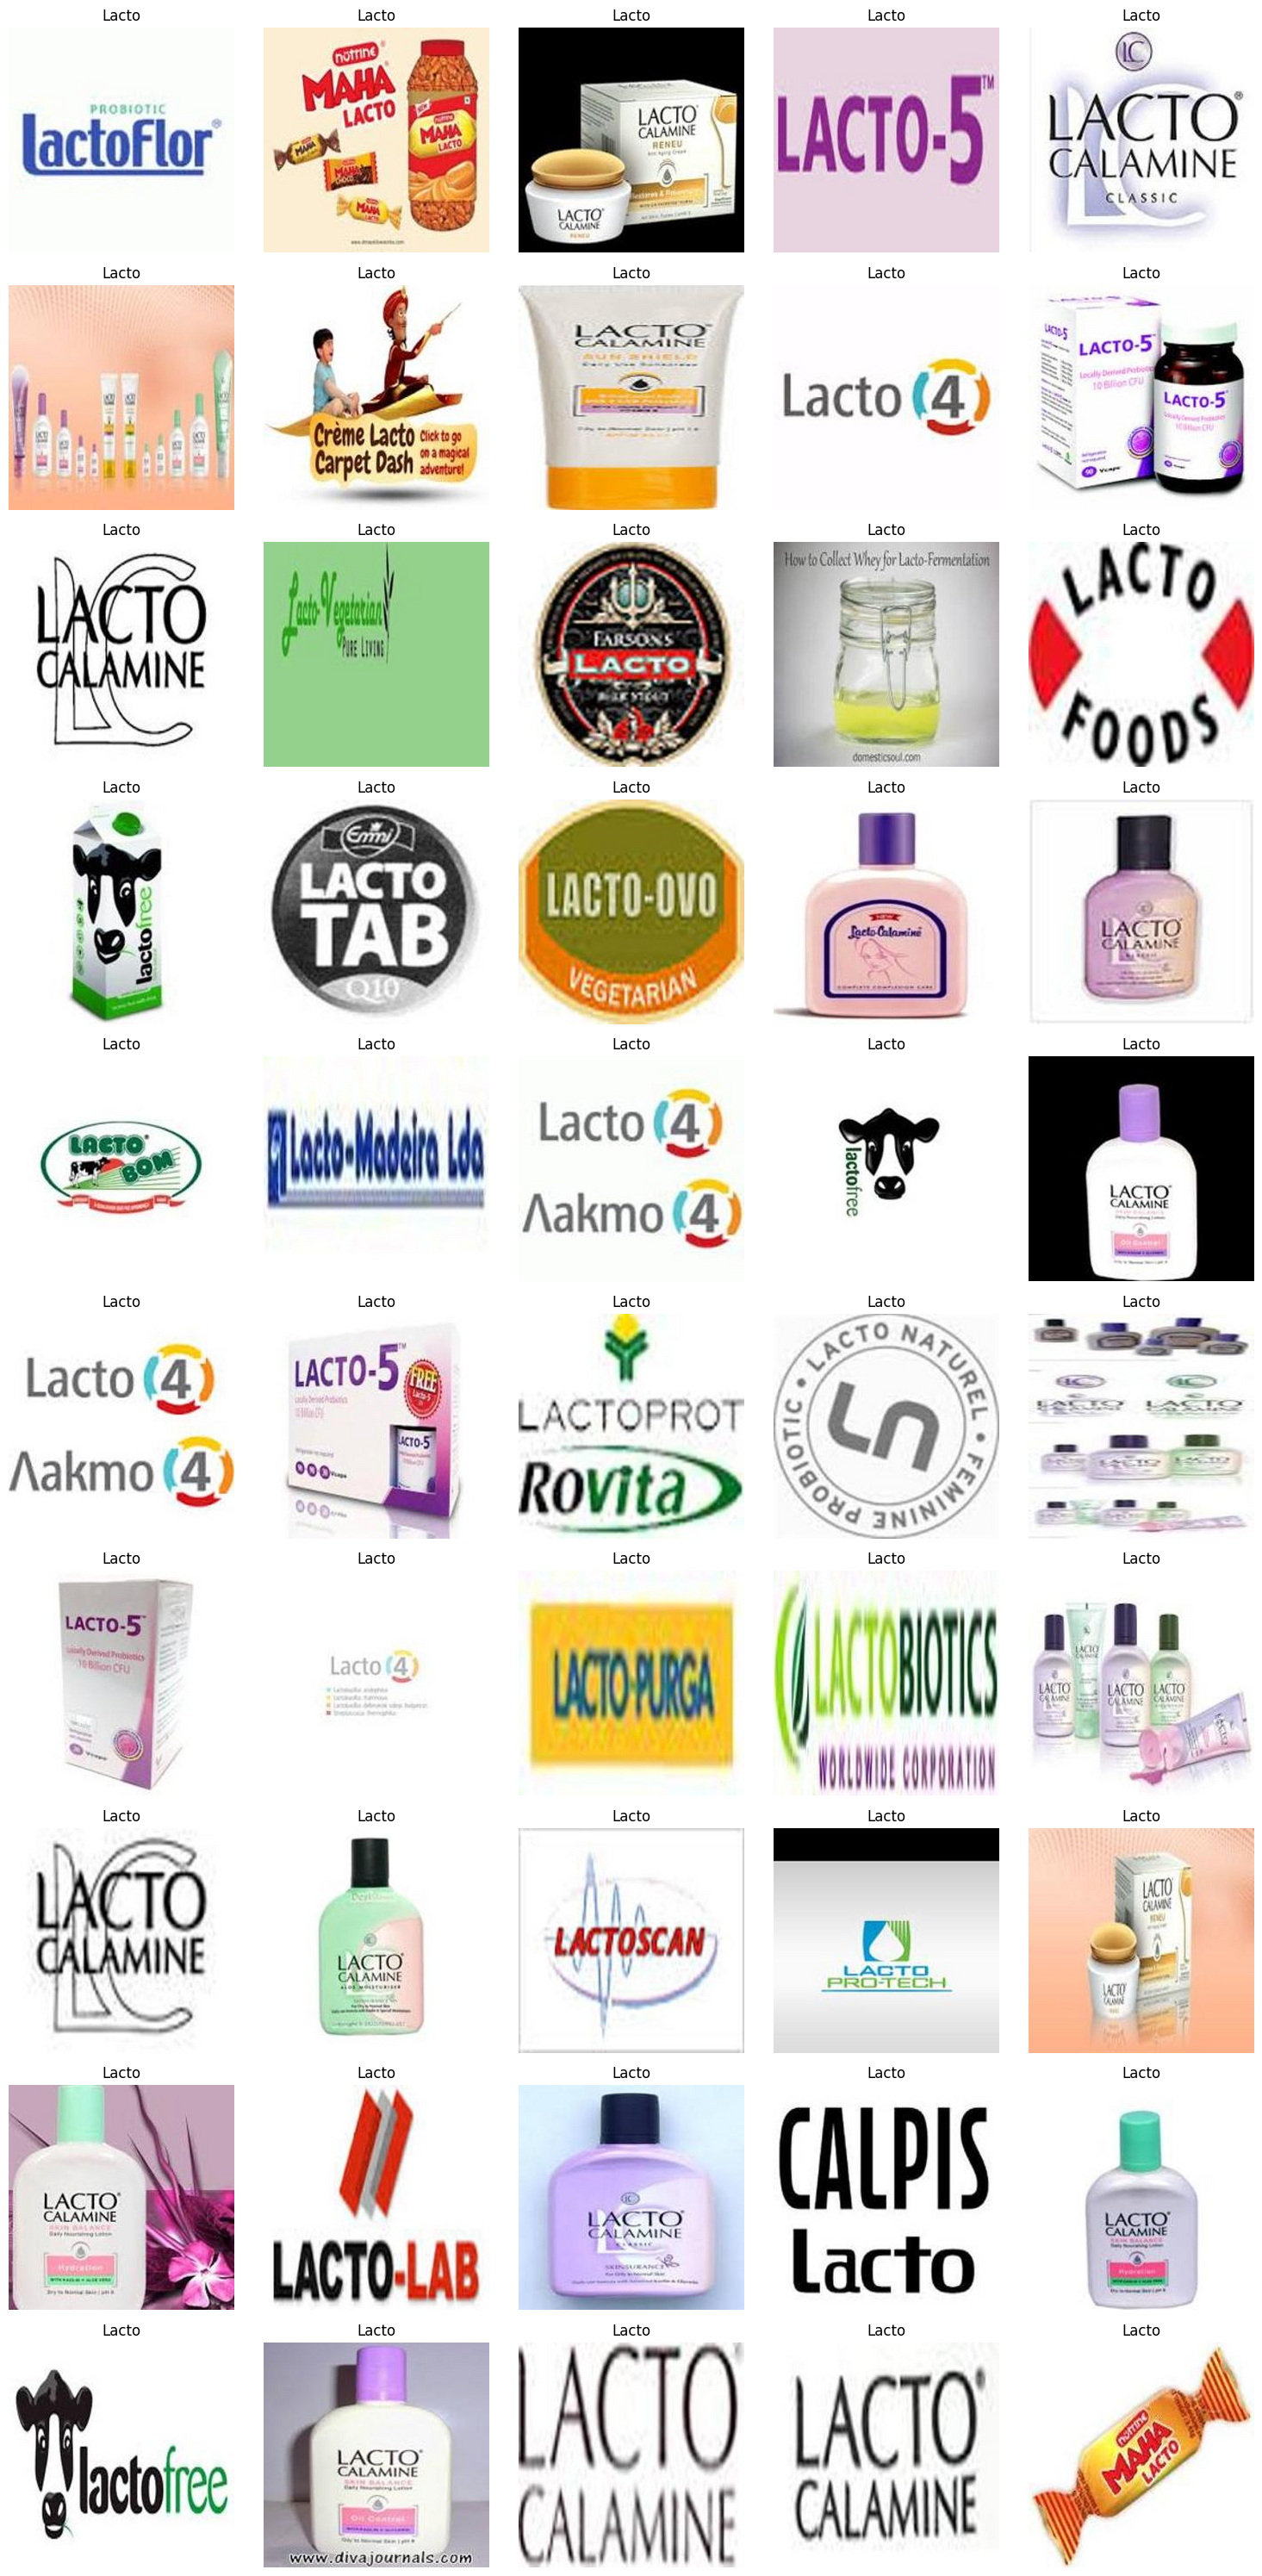

In [49]:
def display_image_samples(df, axistitle = 'Label', num_samples=10):
    """
    Display a specified number of image samples from a DataFrame in a grid format.
    
    Parameters:
    df (DataFrame): DataFrame containing image data.
    num_samples (int): Number of image samples to display.
    """
    # Determine the number of rows and columns in the grid
    num_columns = 5  # Set a fixed number of columns or make it dynamic based on the input
    num_rows = math.ceil(num_samples / num_columns)
    
    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 3))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    # Plot each image in the grid
    for i in range(num_samples):
        img = df['Image'].iloc[i]
        # Convert the PIL Image to a numpy array if it's not already an array
        if not isinstance(img, np.ndarray):
            img = np.array(img)
        
        ax = axes[i]
        ax.imshow(img, interpolation="lanczos")
        ax.axis("off")  # Hide the axes
        ax.set_title(f"{df[axistitle].iloc[i]}")

    # Turn off axes for any unused subplots
    for j in range(num_samples, num_rows * num_columns):
        axes[j].axis("off")
    
    plt.tight_layout()
    plt.show()

display_image_samples(image_df, num_samples=50)

In [ ]:
"""Augmenting and scaling all images ( with 150x150, gray) --> kernel crashed --> took more than 1100 m to run on 2 categories, DO NOT USE for (256,256) RGB""" 

%matplotlib inline

# '''This uses torch vision library to augment the data by changing the colour a bit and randonmly flipping the images'''
# color_aug = torchvision.transforms.ColorJitter(
#     brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1)

# shape_aug = torchvision.transforms.RandomResizedCrop(
#     (100, 100), scale=(0.9, 1), ratio=(0.5, 2))

# augs = torchvision.transforms.Compose([
#     torchvision.transforms.RandomHorizontalFlip(), color_aug, shape_aug])


# #def apply_aug(img, aug, num_rows=1, num_cols=2, scale=1.5):
#     #Y = [aug(img) for _ in range(num_rows * num_cols)]
#     #d2l.show_images(Y, num_rows, num_cols, scale=scale) #ifwe want to plot the augmented images when applying the augmentation

# '''This function will apply the above defined augmentation mechanisms'''
# def apply_aug(img, aug, filename, label, num_rows=1, num_cols=2):
#     augmented_images = [aug(img) for _ in range(num_rows * num_cols)]
    
#     # Convert the augmented images to PIL Image objects if needed
#     augmented_images = [Image.fromarray(img) if not isinstance(img, Image.Image) else img for img in augmented_images]
    
#     # Create a DataFrame to store the augmented images
#     #data = {'Filename': [filename] * len(augmented_images), 'Augmented_Image': augmented_images}
#     data = {'Filename': [filename] * len(augmented_images), 'Label coded': [label] * len(augmented_images), 'Augmented_Image': augmented_images}
#     df = pd.DataFrame(data)
    
#     return df

# def augment_images_new(images_df):
#     '''This function actually applies the augmentation to images in the DataFrame'''
#     dataframes = []  #Creating a list to store the augmented images

#     for index, row in images_df.iterrows(): #Loop through each row in the data frame
#         label = row['Label coded']
#         filename = row['Filename']
        
#         #Find the original image in the input data frame 
#         original_image_row = images_df[images_df['Filename'] == filename].iloc[0]
#         original_image = original_image_row['Image']
        
#         #Apply augmentation of the previous function to the original image
#         augmented_images_df = apply_aug(original_image, augs, filename, label)
        
#         #Append the augmented images to the initilaized list
#         dataframes.append(augmented_images_df)

#     #transform the list to a new data frame
#     augmented_df = pd.concat(dataframes, ignore_index=True)
    
#     return augmented_df

In [6]:
"""Augmenting and scaling all images (25m 12.3s with 270x270) --> (4m 12.6s with 100x100) --> (8m+ with 100x100 RGB)"""

def augment_images(images_df):
    '''This function crops, rotates, and scales images and saves them in the specified output folder'''
    dataframes = []  # List to store DataFrames
    scaler = MinMaxScaler()

    for index, row in images_df.iterrows(): # Loop through each row in the augmented DataFrame
        filename = row['Filename']
        #x1, y1, x2, y2 = row['x1'], row['y1'], row['x2'], row['y2']

        # Find the original image from the images DataFrame
        original_image_row = images_df[images_df['Filename'] == filename].iloc[0]
        original_image = original_image_row['Image']

        # Rotate, scale, and crop the image
        operations = ['original', 'rotated', 'scaled', 'top-bottom flipped']
        images = [original_image, 
                  original_image.rotate(45), 
                  original_image.resize((int(original_image.width * 1.5), int(original_image.height * 1.5))), 
                  original_image.transpose(Image.FLIP_TOP_BOTTOM)
                  ]

        for i in range(len(operations)):
            op = operations[i]
            img = images[i]
            img = img.resize((100, 100), Image.LANCZOS)
            img_array = np.array(img).flatten() # Flatten the pixel array
            img_scaled = scaler.fit_transform(img_array.reshape(-1, 1)).flatten # Scale pixel values to range [0, 1]
            data = {'Filename': [filename], 'Operation': [op]}
            data['Pixels'] = img_scaled
            for j in range(len(img_array)):
                data[f'Pixel_{j}'] = [img_array[j]] # Create a separate column for each scaled pixel
            df = pd.DataFrame(data)
            dataframes.append(df)

    # Concatenate all DataFrames in the list
    modified_df = pd.concat(dataframes, ignore_index=True)
    return modified_df

augmented_df = augment_images(image_df) 
#augmented_df.head()

In [ ]:
augmented_df.to_csv('/Users/veronicalarsson/Downloads/augmented_images.csv', index = False)

### Step 4: Testing Keras Model

In [ ]:
from sklearn.model_selection import train_test_split

#In order to store the data as detailed as possible, we use the data split up into features and labels.
model_data = merged_df
#model_data = pd.read_csv('/Users/veronicalarsson/Downloads/model_data.csv') #8m 59.6s

In [ ]:
# Split the DataFrame into features (pixels) and labels
features = model_data.drop(columns=['Label_Encoded', 'Label', 'Image']).values  # Flattened and scaled features (pixel values)
labels = model_data['Label_Encoded'].values  # Labels

# Reshape the flattened feature data into images (assuming each image is 227x227 pixels)
#image_shape = (227, 227)
#features = features.reshape(-1, *image_shape, 1)  # Reshape flattened features into images and add 1 channel for grayscale images

In [ ]:
"""Creates training and test sets (2m 29.9s)"""
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

In [ ]:
# Building subsets for testing
# X_train = X_train[:100]
# y_train = y_train[:100]
# X_test = X_test[:100]
# y_test = y_test[:100]

# # Display the shapes of the resulting splits
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

In [ ]:
"""Model 1"""
#Building model

xshape = X_train.shape
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = xshape), #The 18144 represents the batch size (number of samples), and 10000 represents the number of features for each sample.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(27)
])

#after the input layer, add the first convolutional layer with 32 2x2-filters 
model_1.add(Conv2D (kernel_size = (2,2), filters = 32, 
                      input_shape=train_tensors.shape[1:], activation='relu'))

#add pooling layer
model_1.add(MaxPooling2D(pool_size=2))

#add the second convolutional layer with 64 2x2-filters 
model_1.add(Conv2D(kernel_size = 2, filters = 64, activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
#add the third convolutional layer with 128 2x2-filters 
model_1.add(Conv2D(kernel_size = 2, filters = 128, activation='relu'))
#add a dropout layer so that each node has a chance of 20% to be dropped when training
model_1.add(Dropout(0.2))
model_1.add(MaxPooling2D(pool_size = 2))
#add a global average pooling layer
model_1.add(GlobalAveragePooling2D())
#add the final fully connected output layer with 109 node for all 109 logo classes
model_1.add(Dense(109, activation = 'softmax'))

model_1.summary()



In [ ]:
#compiling neural network
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#To start training, call the model.fit method—so called because it "fits" the model to the training data:
model_1.fit(X_train, y_train, epochs=10)

#Next, compare how the model performs on the test dataset:
test_loss, test_acc = model_1.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

#predictions
probability_model = tf.keras.Sequential([model_1, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)
print(predictions[0])
#A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 27 different logos.
#You can see which label has the highest confidence value by calling:
print(f'most probable logo is',np.argmax(predictions[0]))

#the model is most confident that this image is XX
#Examining the test label shows that this classification is correct?False?:

y_test[0]

In [ ]:
"""Model 2"""
model_2 = Sequential()
#model_2.add(keras.layers.Flatten(input_shape=100,100))
model_2.add(keras.layers.Dense(10, activation='relu'))
model_2.add(keras.layers.Dropout(0.2))
model_2.add(keras.layers.Dense(27))

model_2.summary()
            
predictions = model_2(X_train[:1]).numpy()
predictions

#Using `tf.nn.softmax` function converts these logits to *probabilities* for each class: 
tf.nn.softmax(predictions).numpy()

#Defining a loss function for training using `losses.SparseCategoricalCrossentropy`:
#This loss is equal to the negative log probability of the true class: 
#The loss is zero if the model is sure of the correct class.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[:1], predictions).numpy()

#Before training, configuring and compiling the model
#Setting the optimizer class to adam, the loss to the loss_fn function defined earlier

model_2.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

#or as before but with sgd: model_2.compile(loss="sparse_categorical_crossentropy",
             #optimizer="sgd",
            # metrics=["accuracy"]) we use sparse... bc sparse labels and classes are exclusive

#training and evaluation
history=model_2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

#or Model.evaluate` method checks the model's performance, usually on a validation set and test set
#model_2.evaluate(x_test,  y_test, verbose=2)

#model to return a probability, you can wrap the trained model, and attach the softmax to it:
probability_model = tf.keras.Sequential([model_2, tf.keras.layers.Softmax()])
probability_model(X_test[:5])
